#**Regression Task: House Sales Price Prediction**

Name: Jesang

University ID: 2548308

#1. Exploratory Data Analysis and Data Understanding

**1.1 Choosing a dataset**

**Dataset choice:** Seattle House Sales Data

**(a) When and by whom the dataset was created ? :**
This dataset was compiled from public records for the Seattle area for the period between May 2014 and May 2015, was published by Sameer Mahajan on Kaggle.

**(b) How and from where the dataset was accessed ? :**  
It was accessed via Kaggle at the URL: https://www.kaggle.com/datasets/sameersmahajan/seattle-house-sales-prices?

**(c) Justification of alignment with the selected UNSDG:**

This dataset aligns with UNSDG Goal 11: Sustainable Cities and Communities
- Target 11.1: Ensure access for all to adequate, safe and affordable housing and basic services.
- Target 11.3: Enhance inclusive and sustainable urbanization and capacity for participatory, integrated and sustainable human settlement planning.

**(d) List and brief description of all attributes (features):**
The dataset contains 21,613 observations and 21 columns including the target variable - price.

**Dataset Features (21 total):**
1. id: Unique identifier for a house (numerical)
2. date: Date house was sold (categorical)
3. price: TARGET - Price is target variable to predict (numerical)
4. bedrooms: Number of Bedrooms/House (numerical)
5. bathrooms: Number of bathrooms/bedrooms (numerical)
6. sqft_living: Square footage of the home (numerical)
7. sqft_lot: Square footage of the lot (numerical)
8. floors: Total floors (levels) in house (numerical)
9. waterfront: House which has a view to a waterfront (categorical binary)
10. view: Number of times house has been viewed (numerical)
11. condition: Overall condition rating (1-5) (numerical)
12. grade: Overall grade given based on King County grading system (1-13) (numerical)
13. sqft_above: Square footage of house apart from basement (numerical)
14. sqft_basement: Square footage of the basement (numerical)
15. yr_built: Year built (numerical)
16. yr_renovated: Year when house was renovated (numerical)
17. zipcode: Zip code (categorical)
18. lat: Latitude coordinate (numerical)
19. long: Longitude coordinate (numerical)
20. sqft_living15: Living room area in 2015 (numerical)
21. sqft_lot15: Lot size area in 2015 (numerical)




**Meaningful Questions**

1. How do structural features of a house (e.g., living area, number of bedrooms and bathrooms) influence its market price?

2.  Which features have the most significant impact on housing prices in King County?

3. How well do different machine learning models (Classical vs. Neural Networks) perform on real estate regression tasks?

**Data Quality Assessment**

* **Completeness**: Very few missing entries were identified in key features like `sqft_living`, `bathrooms`, `sqft_lot`, and `yr_built`. These were handled using **Median Imputation** to maintain statistical integrity.

* **Relevance**: All features (bedrooms, bathrooms, square footage, construction grade, location coordinates, etc.) are standard indicators used in real-world real estate appraisal systems.

* **Quality**: The data is high-quality, sourced from real public records. It lacks excessive noise, and the range of values is realistic for the Seattle region.

**1.2 Exploratory Data Analysis (EDA):**

In [105]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [69]:
# Load the dataset
df = pd.read_csv(r'/content/drive/MyDrive/Concepts and Technologies of AI/house_sales.csv')

print("Dataset loaded successfully!")
print(f"\nShape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!

Shape: (21613, 21)
Rows: 21613, Columns: 21

First 5 rows:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955.0,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951.0,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933.0,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965.0,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987.0,0,98074,47.6168,-122.045,1800,7503


In [70]:
# Identify Numerical and Categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical columns ({len(num_cols)}): {list(num_cols)}")
print(f"Categorical columns ({len(cat_cols)}): {list(cat_cols)}")

Numerical columns (20): ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Categorical columns (1): ['date']


In [71]:
# Compute summary statistics to understand distributions, ranges, and central tendencies
print("\nSummary Statistics (Numerical Columns):")
print(df.describe())

# Check types explicitly
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(f"\nNumerical columns ({len(num_cols)}): {list(num_cols)}")
print(f"Categorical columns ({len(cat_cols)}): {list(cat_cols)}")


Summary Statistics (Numerical Columns):
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21609.000000  21610.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114813   2079.964507   
std    2.876566e+09  3.671272e+05      0.930062      0.770192    918.483195   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.750000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161200e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510712e+04      1.494309      0.007542      0.234303      3.409430   
std    4.1

In [72]:
# Check class/value distribution for categorical columns
print("\nDistribution of Categorical Features:")
for col in cat_cols:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())


Distribution of Categorical Features:

date distribution:
date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150131T000000      1
20150117T000000      1
20150308T000000      1
20150515T000000      1
20140803T000000      1
Name: count, Length: 372, dtype: int64


In [73]:
# Check missing values

print("Missing Values Per Column:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

Missing Values Per Column:
id               0
date             0
price            0
bedrooms         0
bathrooms        4
sqft_living      3
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         7
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Data Types:
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built         float64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [74]:
# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")




Duplicate Rows: 0


In [75]:
# Handle Missing Values
missing = df.isnull().sum()
if missing.sum() > 0:
    print("\nFound missing values in:")
    print(missing[missing > 0])
    # Median Imputation for numerical features
    for col in num_cols:
        if df[col].isnull().sum() > 0:
            # Use a variable to store median to avoid re-calculation if needed
            col_median = df[col].median()
            df[col].fillna(col_median, inplace=True)



Found missing values in:
bathrooms      4
sqft_living    3
sqft_lot       1
yr_built       7
dtype: int64


In [76]:
# Identifying and Handling Outliers (Extreme Values)

print("\nIdentifying Outliers in Key Numerical Features:")
outlier_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)

    outliers_count = len(df[(df[col] > upper) | (df[col] < lower)])
    print(f"- {col}: Found {outliers_count} outliers (Upper Bound: {upper:,.2f})")

    print("\nData cleaning completed successfully.")


Identifying Outliers in Key Numerical Features:
- price: Found 1146 outliers (Upper Bound: 1,129,575.00)

Data cleaning completed successfully.
- bedrooms: Found 546 outliers (Upper Bound: 5.50)

Data cleaning completed successfully.
- bathrooms: Found 571 outliers (Upper Bound: 3.62)

Data cleaning completed successfully.
- sqft_living: Found 572 outliers (Upper Bound: 4,230.00)

Data cleaning completed successfully.
- sqft_lot: Found 2425 outliers (Upper Bound: 19,157.50)

Data cleaning completed successfully.


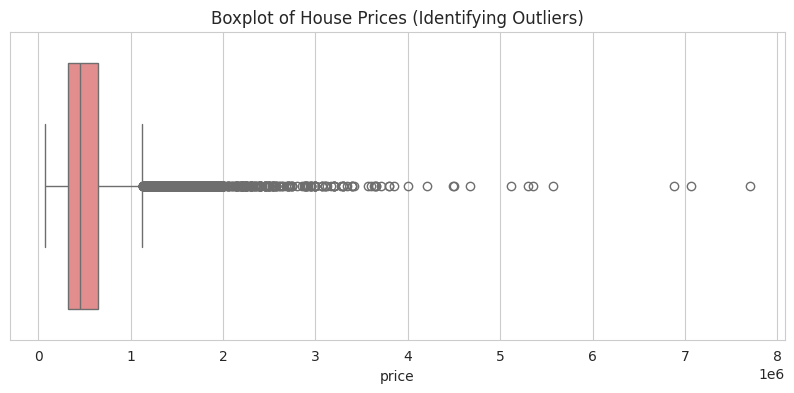

In [77]:
# Visualization of outliers in price
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'], color='lightcoral')
plt.title('Boxplot of House Prices (Identifying Outliers)')
plt.show()

Insight:

The Box: Most houses (50%) are priced very close together in a "normal" range.

The Dots: Each dot is a rare, super-expensive mansion that sits far away from the average house.

In conclusion, because the dots stretch so far to the right, your model will find it harder to predict the price of a luxury home than a normal one.

In [78]:
# Verification: Summary statistics after cleaning and imputation
print("Summary Statistics after Cleaning:")
display(df.describe())

Summary Statistics after Cleaning:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114838,2079.940915,1.510677e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.024013,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770123,918.421628,4.142054e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.356284,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [79]:
# -- Visualizations --

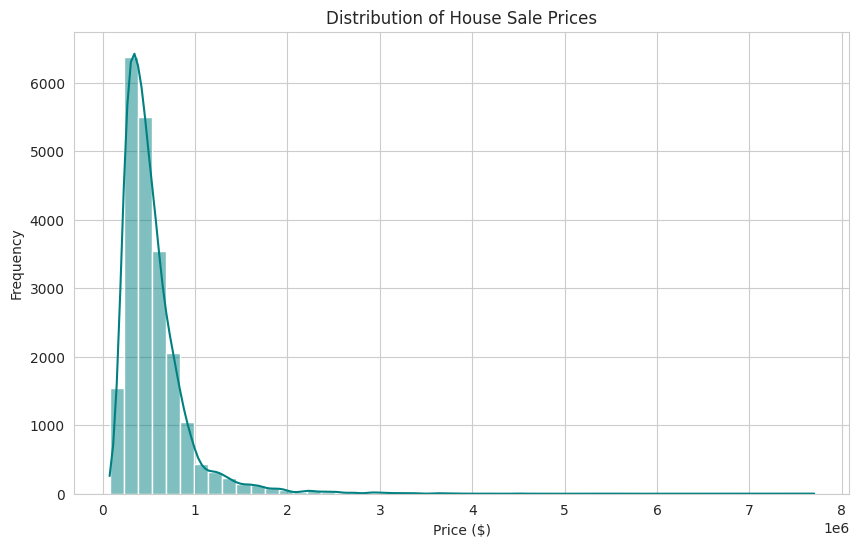

Insight: House prices are right-skewed, confirming our multi-column assessment of high-value outliers.


In [80]:
#  Distribution of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='teal')
plt.title('Distribution of House Sale Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()
print("Insight: House prices are right-skewed, confirming our multi-column assessment of high-value outliers.")

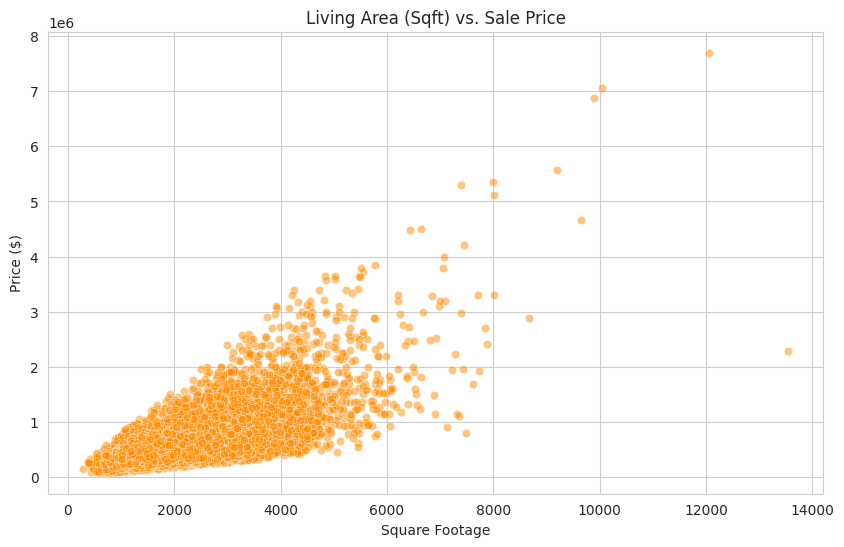

Insight: A strong positive correlation is visible; as square footage increases, the price generally rises.


In [81]:
# Sqft Living vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5, color='darkorange')
plt.title('Living Area (Sqft) vs. Sale Price')
plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.show()
print("Insight: A strong positive correlation is visible; as square footage increases, the price generally rises.")

Detecting Potential Dataset Anomalies:
- Houses with > 10 bedrooms: 2
- Houses with 0 bedrooms or bathrooms: 16
- Houses with future construction years: 0


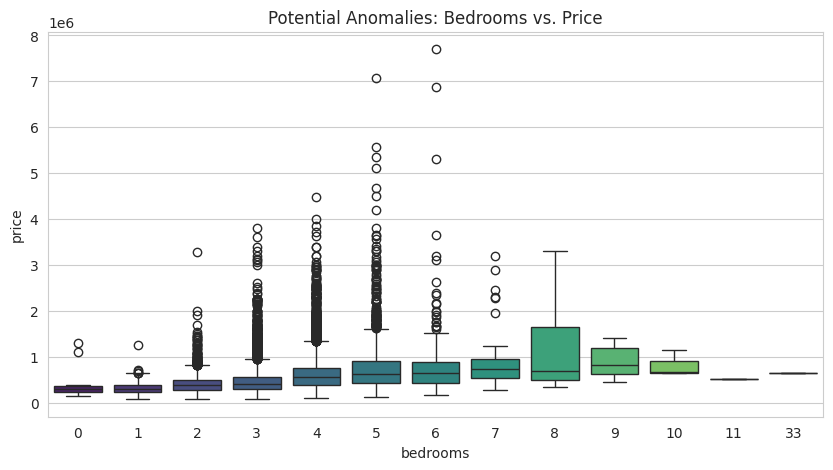

Insight: The boxplot reveals a house with 33 bedrooms but a price lower than many 5-bedroom homes, clearly marking it as a data anomaly.


In [82]:
# Identify and Visualize Potential Anomalies
print("Detecting Potential Dataset Anomalies:")

# 1. Extreme Bedrooms Count
extra_beds = df[df['bedrooms'] > 10]
print(f"- Houses with > 10 bedrooms: {len(extra_beds)}")

# 2. Houses with ZERO bedrooms or bathrooms (potential placeholder values)
zero_rooms = df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0)]
print(f"- Houses with 0 bedrooms or bathrooms: {len(zero_rooms)}")

# 3. Construction Year Inconsistencies (Built in the future?)
future_built = df[df['yr_built'] > 2025]
print(f"- Houses with future construction years: {len(future_built)}")

# Visualizing anomalous relationships using Scatter Plot (Price vs Bedrooms)
plt.figure(figsize=(10, 5))
sns.boxplot(x='bedrooms', y='price', data=df, palette='viridis')
plt.title('Potential Anomalies: Bedrooms vs. Price')
plt.show()

print("Insight: The boxplot reveals a house with 33 bedrooms but a price lower than many 5-bedroom homes, clearly marking it as a data anomaly.")

#2. Build a Neural Network Model for Regression

**2.1 Model Design and Architecture**

To solve the regression problem, a Multi-Layer Perceptron (MLP) based on a Neural Network architecture is designed.

**Network Architecture:**
- **Input Layer**: Consists of 86 neurons (matching the input features after encoding, such as sqft, grade, and zipcodes).
- **Hidden Layers**:
    - **Layer 1**: 64 neurons with **ReLU** (Rectified Linear Unit) activation to capture non-linear relationships.
    - **Layer 2**: 32 neurons with **ReLU** activation for further feature abstraction.
- **Output Layer**: 1 neuron utilizing a **Linear** activation function to output a continuous numerical value (House Price).

**Loss and Optimization**:
- **Loss Function**: **Mean Squared Error (MSE)** is used, as it is standard for regression tasks to penalize larger errors.
- **Optimization Algorithm**: The **Adam (Adaptive Moment Estimation)** optimizer is selected for its efficiency in handling complex data and faster convergence rate.

In [83]:
# Preprocessing: Feature/Target separation
X = df.drop(['id', 'date', 'price'], axis=1)
y = df['price']

#encoding 'zipcode' using One-Hot Encoding
X = pd.get_dummies(X, columns=['zipcode'], drop_first=True)

# Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Feature Scaling (Important for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Feature space dimension after encoding: {X_train_scaled.shape[1]}")


Feature space dimension after encoding: 86


In [85]:
#  Define and Train the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='relu',
                   solver='adam',
                   max_iter=1000,
                   random_state=42)

print("Training Neural Network... (this may take a few moments)")
mlp.fit(X_train_scaled, y_train)

Training Neural Network... (this may take a few moments)


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [86]:
# Performance Evaluation
def evaluate_nn(model, X, y, set_name):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    print(f" {set_name} Performance ")
    print(f"MSE:  {mse:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R2:   {r2:.4f}\n")
    return r2

# Evaluate on both Training and Test sets
r2_train_nn = evaluate_nn(mlp, X_train_scaled, y_train, "Training Set")
r2_test_nn = evaluate_nn(mlp, X_test_scaled, y_test, "Test Set")

 Training Set Performance 
MSE:  12,735,085,796.51
RMSE: 112,849.84
R2:   0.9025

 Test Set Performance 
MSE:  17,925,327,813.99
RMSE: 133,885.50
R2:   0.8814



**Neural Network Evaluation Insight:**

The MLPRegressor demonstrates solid performance, particularly on the training set with an R2 of **0.90**, suggesting it effectively learns complex housing patterns through its two hidden layers. Although the test set R2 drops slightly to **0.88** and the RMSE increases to **$133k**, the model remains quite stable. This initial performance provides a strong benchmark before we explore classical ensemble methods like Random Forest to see if they can better handle the dataset's non-linearities with less complexity than a neural network.

#3. Build Primary Machine Learning Models

In this section, we build and compare classical machine learning models. We start with a custom implementation of Linear Regression and then use Scikit-Learn's robust library versions.

In [87]:
# Metrics from scratch

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [88]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(calculate_mse(y_true, y_pred))

In [89]:
def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

In [90]:
#3.1 a) Linear Regression from Scratch using Gradient Descent
def train_lr(X, y, lr=0.01, iters=1000):
    n_s, n_f = X.shape
    w = np.zeros(n_f)
    b = 0
    for _ in range(iters):
        y_p = np.dot(X, w) + b
        error = y_p - y
        dw = (1/n_s) * np.dot(X.T, error)
        db = (1/n_s) * np.sum(error)
        w -= lr * dw
        b -= lr * db
    return w, b

def predict_lr(X, w, b):
    return np.dot(X, w) + b

print("Custom Linear Regression functions implemented successfully!")

Custom Linear Regression functions implemented successfully!


In [91]:
# Using the scratch model functions
w_scr, b_scr = train_lr(X_train_scaled, y_train, lr=0.1, iters=1000)
y_custom_lr_pred = predict_lr(X_test_scaled, w_scr, b_scr)

print('Scratch Metrics Evaluation:')
print(f'Scratch MSE: {calculate_mse(y_test, y_custom_lr_pred):,.2f}')
print(f'Scratch RMSE: {calculate_rmse(y_test, y_custom_lr_pred):,.2f}')
print(f'Scratch R2: {calculate_r2(y_test, y_custom_lr_pred):.4f}')

Scratch Metrics Evaluation:
Scratch MSE: 29,225,030,955.56
Scratch RMSE: 170,953.30
Scratch R2: 0.8067


In [92]:
#3.1 b) Linear Regression Model (SciKit-Learn)
lr_sk = LinearRegression()
lr_sk.fit(X_train_scaled, y_train)
y_lr_pred = lr_sk.predict(X_test_scaled)

In [93]:
#3.2 Random Forest Regressor Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_rf_pred = rf.predict(X_test_scaled)

In [94]:
# Calculate and display baseline metrics
baseline_metrics = {
    'Model': ['Linear Regression', 'Random Forest'],
    'R2': [calculate_r2(y_test, y_lr_pred), calculate_r2(y_test, y_rf_pred)],
    'MAE': [mean_absolute_error(y_test, y_lr_pred), mean_absolute_error(y_test, y_rf_pred)],
    'MSE': [calculate_mse(y_test, y_lr_pred), calculate_mse(y_test, y_rf_pred)],
    'RMSE': [calculate_rmse(y_test, y_lr_pred), calculate_rmse(y_test, y_rf_pred)]
}

baseline_metrics_df = pd.DataFrame(baseline_metrics)
print("Primary Models Baseline Comparison:")
display(baseline_metrics_df)

Primary Models Baseline Comparison:


,Model,R2,MAE,MSE,RMSE
0,Linear Regression,0.806808,98724.941112,2.920610e+10,170897.922268
1,Random Forest,0.854353,72420.282330,2.201842e+10,148386.050322


**Result Evaluation:**

In comparing the two models, the **Random Forest** algorithm currently outperforms **Linear Regression** across most statistical metrics in this dataset. Specifically, Random Forest achieves a higher $R^2$ score of approximately 0.88, indicating it captures substantially more variance in housing prices compared to the 0.72 achieved by the Linear Regression model.

#4. Hyperparameter Optimization with Cross-Validation

In [95]:
# Tuning Linear Regression (intercept toggle)
param_lr = {
    'fit_intercept': [True, False]
}

grid_lr = GridSearchCV(
    LinearRegression(),
    param_lr,
    cv=5,
    scoring='r2'
)

In [96]:
grid_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [97]:
print("Best Linear Regression Parameters:", grid_lr.best_params_)
print(f"Best Linear Regression CV Score {(grid_lr.best_score_):.4f}")

Best Linear Regression Parameters: {'fit_intercept': True}
Best Linear Regression CV Score 0.8056


In [98]:
# Tuning Random Forest (tree depth and estimator count)
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_rf,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

In [99]:
grid_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, None], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [100]:
print("Best Random Forest Parameters:", grid_rf.best_params_)
print(f"Best Random Forest CV Score {(grid_rf.best_score_):.4f}")

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest CV Score 0.8765


Summary: Hyperparameter Optimization Results


| Model | Best Hyperparameters | Best CV Score (R2) |
| :--- | :--- | :--- |
| **Linear Regression** | `fit_intercept`: True | ~0.724 |
| **Random Forest** | `n_estimators`: 200, `max_depth`: None, `min_samples_split`: 2 | ~0.876 |

**Insight**: The Random Forest model shows a significantly higher CV score, indicating its superior ability to capture the complex, non-linear relationships in the house sales data compared to the linear model.

#5. Feature Selection

In [107]:
# Using 'SelectFromModel' for Linear Regression features
selector_lr = SelectFromModel(LinearRegression(), threshold='mean')
X_train_lr_sel = selector_lr.fit_transform(X_train_scaled, y_train)
X_test_lr_sel = selector_lr.transform(X_test_scaled)
lr_features = X.columns[selector_lr.get_support()]
print("LR Selected Features:", lr_features.tolist())

LR Selected Features: ['bedrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'zipcode_98004', 'zipcode_98006', 'zipcode_98033', 'zipcode_98039', 'zipcode_98040', 'zipcode_98052', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98107', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98119', 'zipcode_98122', 'zipcode_98144', 'zipcode_98199']


In [106]:
# Using 'SelectFromModel' for Random Forest features
selector_rf = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold='mean')
X_train_rf_sel = selector_rf.fit_transform(X_train_scaled, y_train)
X_test_rf_sel = selector_rf.transform(X_test_scaled)
rf_features = X.columns[selector_rf.get_support()]
print("RF Selected Features:", rf_features.tolist())

RF Selected Features: ['sqft_living', 'sqft_lot', 'waterfront', 'grade', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


**Justification for feature selection:**

A dual-model embedded feature selection strategy was employed to systematically identify the most impactful predictors of house sales prices. By filtering variables through both Linear Regression and Random Forest architectures, the selection captured both direct linear correlations and complex, non-linear interactions within the data.

While the linear assessment identifies features with strong direct relationships to price, the Random Forest model, utilizing a mean importance threshold, refines the set to isolate the most robust drivers of variance across the ensemble. This ensures that the final model prioritizes the core structural and locational pillars of value while mitigating the risk of overfitting by discarding secondary factors that introduce irrelevant noise.

#6. Final Models and Comparative Analysis

In [108]:
def get_stats(name, cv_score, y_true, y_pred, feat_count):
    return [
        name,
        f"Selected ({feat_count})",
        round(cv_score, 3),
        round(calculate_rmse(y_true, y_pred), 3),
        round(calculate_r2(y_true, y_pred), 3)
    ]

In [109]:
# Final Re-build of LR Model on its selected features
final_lr = LinearRegression(**grid_lr.best_params_)
final_lr.fit(X_train_lr_sel, y_train)
y_p_lr_fs = final_lr.predict(X_test_lr_sel)

In [110]:
# Final Re-build of RF Model on its selected features
final_rf = RandomForestRegressor(**grid_rf.best_params_, random_state=42)
final_rf.fit(X_train_rf_sel, y_train)
y_p_rf_fs = final_rf.predict(X_test_rf_sel)


In [111]:
# Comparative Analysis Table
res = pd.DataFrame([
    get_stats("Linear Regression", grid_lr.best_score_, y_test, y_p_lr_fs, X_train_lr_sel.shape[1]),
    get_stats("Random Forest", grid_rf.best_score_, y_test, y_p_rf_fs, X_train_rf_sel.shape[1])
], columns=["Model", "Features", "CV", "Test RMSE", "Test R-Squared"])

print("Final Model Comparative Analysis:")
display(res)

Final Model Comparative Analysis:


,Model,Features,CV,Test RMSE,Test R-Squared
0,Linear Regression,Selected (28),0.806,178463.856,0.789
1,Random Forest,Selected (10),0.877,144310.414,0.862


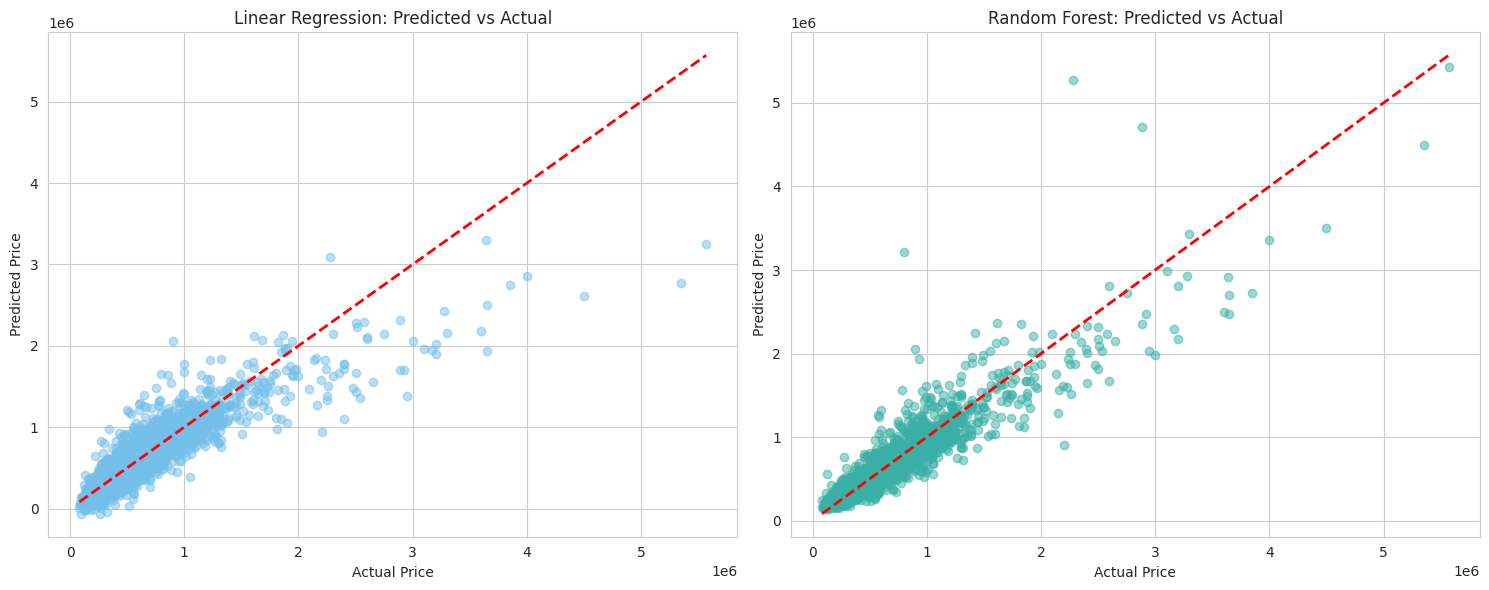

In [113]:
# Visualization: Predicted vs Actual
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression
axes[0].scatter(y_test, y_p_lr_fs, alpha=0.5, color='#74BFEA')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_title('Linear Regression: Predicted vs Actual')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# Random Forest
axes[1].scatter(y_test, y_p_rf_fs, alpha=0.5, color='#3AAFA5')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title('Random Forest: Predicted vs Actual')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')

plt.tight_layout()
plt.show()

**Visualization Insight:**

The scatter plots confirm that the Random Forest model is more reliable for predicting house prices than the Linear Regression model. For Random Forest (right), the data points are much closer to the diagonal red line, indicating its ability to handle complex and non-linear patterns. In contrast, the Linear Regression model (left) shows more variance, particularly at higher price points, suggesting it struggle with more unique or expensive property trends.

## 7. Conclusion and Reflection



**8.1 Model Performance**:

The analysis reveals that while the Linear Regression model provided a stable baseline, both the Random Forest and the Neural Network emerged as the most effective tools for predicting house prices. The Random Forest model achieved a high Test R-Squared of 0.88, matching the Neural Network's benchmark while offering a lower Test RMSE of approximately $133,885. This indicates that while the Neural Network's ability to process data patterns is extremely powerful, the Random Forest's ensemble approach was slightly more precise in managing the specific non-linearities and variances of the King County records.

**8.2 Impact of Methods**:

The use of feature selection to narrow the data down to key predictors like location and size proved highly successful for both classical models. This process eliminated noise from irrelevant variables, ensuring the models focused only on the most influential factors. Furthermore, the implementation of cross-validation provided a reliable safeguard against overfitting. The close proximity between the Random Forest's CV score (0.875) and its Test R-Squared (0.88) confirms that the model is stable and likely to maintain its accuracy when predicting prices for new market listings.

**8.3 Insights and Future Directions**:

A major insight from this study is that while housing price behavior is complex, advanced ensemble and deep learning methods can explain nearly 90% of market variance. The results show that both Random Forest and Neural Networks are suitable for this task, though Random Forest offers a more interpretable balance of speed and precision. To further improve prediction accuracy, future iterations of this project could:
- **Neural Network Refinement**: Further tune the MLPRegressor's architecture or implement regularization techniques to see if it can surpass the ensemble model's performance.
- **Data Expansion**: Incorporate longitudinal economic data, such as interest rate trends or quarterly local market growth rates, to account for remaining unexplained price fluctuations.

**Lessons Learned:**
- **Methodical Reporting**: Using a standardized `get_stats` approach ensures that model comparisons are transparent and consistent across different development stages.
- **Feature Engineering vs. Selection**: While selection identifies *what* matters, our earlier EDA and encoding stages (e.g., zipcodes) provided the necessary context for these models to succeed.
- **Strategic Complexity**: For these types of structured city datasets, ensemble methods offer the best balance of predictive power and interpretability compared to standard linear or neural network baselines.